## Average Salaries of Respondents by Language and Age

In [58]:
from matplotlib import pyplot as plt
from matplotlib import pylab
import pandas as pd
import numpy as np
import csv


In [59]:
data = pd.read_csv("C:/Users/MSI/Desktop/data-science-projects/project-2/survey_results_public.csv")

In [60]:
data = data[["Age", "ConvertedComp", "LanguageWorkedWith"]]
data.head(3)

,Age,ConvertedComp,LanguageWorkedWith
0,14.0,NaN,HTML/CSS;Java;JavaScript;Python
1,19.0,NaN,C++;HTML/CSS;Python
2,28.0,8820.0,HTML/CSS


In [61]:
data = data[(data["Age"] >= 18) & (data["Age"] <= 40)]
data["Age"] = data["Age"].round()
data.head()

,Age,ConvertedComp,LanguageWorkedWith
1,19.0,NaN,C++;HTML/CSS;Python
2,28.0,8820.0,HTML/CSS
3,22.0,61000.0,C;C++;C#;Python;SQL
4,30.0,NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
5,28.0,366420.0,Java;R;SQL


In [62]:
all_dev_sal = data.groupby("Age")["ConvertedComp"].median().dropna()
all_dev_sal_list = all_dev_sal.tolist()

ages_list = data["Age"].sort_values().unique().tolist()
ages_list = [int(number) for number in ages_list]

In [63]:
resp_know_python = data[data["LanguageWorkedWith"].str.contains("Python", na=False)]
python_age_and_salary = resp_know_python.groupby("Age")["ConvertedComp"].median()
python_salaries_list = python_age_and_salary.to_list()

In [64]:
resp_know_js = data[data["LanguageWorkedWith"].str.contains("JavaScript", na=False)]
js_age_and_salary = resp_know_js.groupby("Age")["ConvertedComp"].median()
js_salaries_list = js_age_and_salary.to_list()

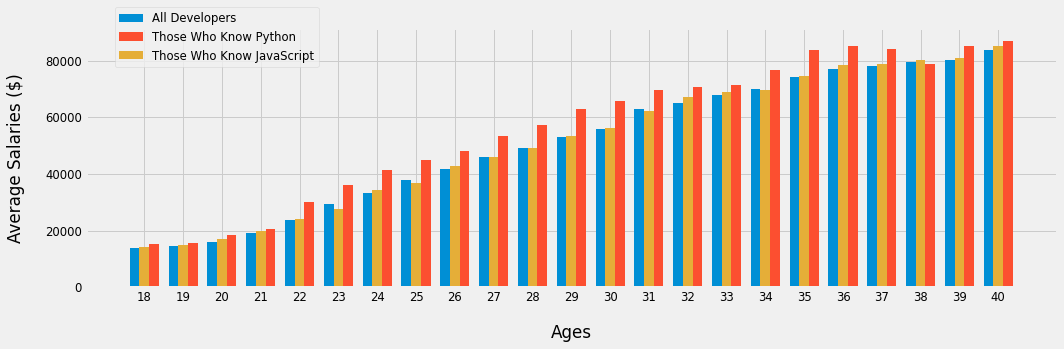

In [65]:
plt.style.use("fivethirtyeight")

params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)

x_indexes = np.arange(len(ages_list))
width = 0.25
overall_median = 51960

plt.bar(x_indexes - width, all_dev_sal_list, width=width, label="All Developers")
plt.bar(x_indexes + width, python_salaries_list, width=width, label="Those Who Know Python")
plt.bar(x_indexes, js_salaries_list, width=width, label="Those Who Know JavaScript")

plt.xticks(ticks=x_indexes, labels=ages_list)
plt.xlabel("Ages", labelpad=20)
plt.ylabel("Average Salaries ($)", labelpad=20)
plt.legend(loc=(0.03, 0.85))
plt.tight_layout()

plt.show()

In [66]:
data_as_dict = {"Average_Dev": all_dev_sal_list, 
                "Python_Dev": python_salaries_list,
                "Js_Dev": js_salaries_list,
                "Age": ages_list
                }

df = pd.DataFrame(data=data_as_dict)
df.set_index("Age", inplace=True)

df.to_csv("data", sep="\t")

In [67]:
second_data = pd.read_csv("data.csv", delimiter="\t")
python_salaries = second_data["Python_Dev"]
js_salaries = second_data["Js_Dev"]

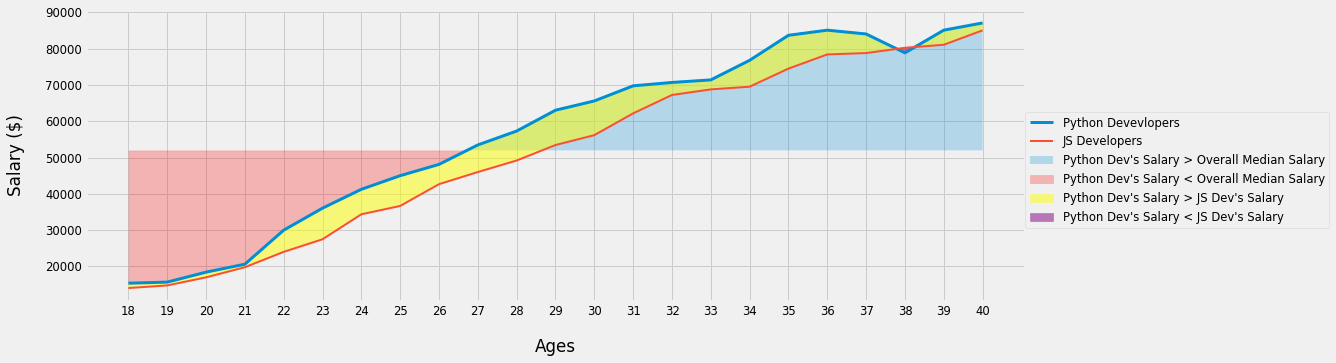

In [69]:
# Red part of tha graph shows where python developers' salaries are less than 
# overall median salary of all developers. 
# Blue part shows opposite of the above statement. 
# Green part shows where python devevlopers have more salary than js developers.

plt.plot(ages_list, python_salaries_list, linewidth=3, label="Python Devevlopers")
plt.plot(ages_list, js_salaries_list, linewidth=2, label="JS Developers")
# plt.plot(ages_list, all_dev_sal_list, color="#6d6875", linestyle="--", linewidth=2)

plt.fill_between(ages_list, python_salaries, overall_median, alpha=0.25,
                where=(python_salaries >= overall_median), interpolate=True, 
                label="Python Dev's Salary > Overall Median Salary")

plt.fill_between(ages_list, python_salaries, overall_median, alpha=0.25,
                where=(python_salaries <= overall_median), color="red", interpolate=True,
                label="Python Dev's Salary < Overall Median Salary")

plt.fill_between(ages_list, python_salaries, js_salaries, alpha=0.5,
                where=(python_salaries >= js_salaries), color="yellow", interpolate=True,
                label="Python Dev's Salary > JS Dev's Salary")

plt.fill_between(ages_list, python_salaries, js_salaries, alpha=0.5,
                where=(python_salaries <= js_salaries), color="purple", interpolate=True,
                label="Python Dev's Salary < JS Dev's Salary")

plt.xticks(ticks=ages_list, labels=ages_list)
plt.xlabel("Ages", labelpad=20)
plt.ylabel("Salary ($)", labelpad=20)
plt.legend(loc=(1, 0.25))

plt.show()